# 📊 Introduction 
![](https://www.yieldify.com/wp-content/uploads/2020/06/Segmentation_Icon.webp)

**Welcome to the exciting world of data exploration and analysis! In this project, we dive into a dataset that combines information about credit consumers and small to medium-sized enterprises (SMEs). Through a series of visualizations and analyses, we aim to uncover insights, patterns, and relationships within the data.**

**👥 Understanding the Data: Credit Consumers and SMEs**

Our dataset consists of two main components: credit consumers and SMEs. Credit consumers bring a personal touch, with details such as age, credit score, transaction amounts, and late payments. On the other hand, SMEs contribute a business perspective, featuring annual revenue, credit score, late payments, and industry categorizations.

**🧐 Exploration and Insights**

To start, we've conducted exploratory data analysis (EDA) on each dataset separately, digging into statistical summaries, distributions, and correlations. This helps us grasp the individual characteristics of credit consumers and SMEs.

We've employed various visualization techniques, including scatter plots, pair plots, and box plots, to visualize relationships between different variables. Whether it's understanding the distribution of credit scores or exploring the interplay between transaction amounts and loan amounts, our visuals provide a comprehensive view.

One of the intriguing aspects of our analysis is the comparison between credit consumers and SMEs. We've introduced a new dimension by categorizing the entities, allowing us to compare and contrast credit scores through engaging visualizations like box plots and violin plots.

**🛠️ Unveiling Clusters for Deeper Insights**

Taking it a step further, we've introduced clustering techniques to identify patterns within the data. Clustering provides us with an opportunity to group similar entities together. The 'Cluster' column, added through KMeans clustering, opens the door to understanding subgroups within credit consumers and SMEs.

**📈 Customer Segmentation for Targeted Marketing 🎯**

Objective: Assist credit bureau members in targeted marketing efforts.

Approach: Apply clustering algorithms to segment credit consumers based on their financial behavior. Develop personalized marketing strategies for different customer segments.

Outcome: Improve the effectiveness of marketing campaigns, leading to increased engagement and participation from credit consumers.

By employing sophisticated clustering techniques, we aim to group credit consumers with similar financial characteristics. This segmentation will enable us to tailor marketing strategies that resonate with the distinct needs and preferences of each group. The ultimate goal is to enhance the overall effectiveness of marketing campaigns, fostering deeper connections with credit consumers and driving higher engagement levels.

# 📚 Import Libraries

In [1]:
import pandas as pd               # Data manipulation and analysis
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Statistical data visualization
import plotly.express as px       # Interactive visualizations
import plotly.graph_objects as go  # Advanced Plotly visualizations
import plotly.figure_factory as ff # Plotly figures
from sklearn.cluster import KMeans # KMeans clustering
from sklearn.preprocessing import StandardScaler # Data scaling

/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 👥 Understanding the Data: Credit Consumers and SMEs

In [2]:
# Specify the file path
credit_consumers = './Data/credit_consumers_data.csv'
smes = './Data/smes_data.csv'

# Read the CSV file into a DataFrame
credit_consumers_df = pd.read_csv(credit_consumers)
smes_df = pd.read_csv(smes)

In [3]:
credit_consumers_df.head()

,CustomerID,Name,Age,CreditScore,TransactionAmount,LoanAmount,LatePayments
0,e11fa949-37eb-4999-bdbd-5d3c401b80fa,Chloe Cooke,43.0,592.0,5014.0,2678.0,2.0
1,416c9fe3-d43b-45a5-978e-aa8a4311b5c9,Curtis Nguyen,36.0,337.0,2265.0,1354.0,5.0
2,b1b99342-704e-449f-90f7-2c5287518e1f,Joseph Gonzalez,47.0,529.0,2975.0,4134.0,2.0
3,67a301f6-c1ad-49be-92f6-36e6201c82ac,Anthony Webster,32.0,810.0,4140.0,2108.0,2.0
4,a90ff7c6-c1ac-4fe5-896f-dfb1685b7a3b,Felicia Blair,63.0,394.0,6080.0,4282.0,0.0


In [4]:
smes_df.head()

,BusinessID,BusinessName,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology
0,1616c3df-e6eb-4683-843e-dd09c32fef64,Parker Inc,4229027.0,712.0,7.0,0.0,1.0,0.0
1,6eebfe2a-0c55-48c7-bd84-f4f044d3b5f4,Baker LLC,1402314.0,448.0,3.0,0.0,0.0,0.0
2,b752456e-fc95-47bb-8751-65080e99e792,"Mcmahon, Miller and Daniel",1329220.0,409.0,10.0,0.0,0.0,0.0
3,a09d1441-7b38-423e-8dc1-dcc54c9300be,Shields-Mata,3965091.0,682.0,3.0,0.0,0.0,1.0
4,9c853fac-3413-48e1-a941-a82891141a9e,"Burton, Anderson and Morris",2255516.0,550.0,10.0,0.0,0.0,0.0


In [5]:
credit_consumers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   object 
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   float64
 3   CreditScore        1000 non-null   float64
 4   TransactionAmount  1000 non-null   float64
 5   LoanAmount         1000 non-null   float64
 6   LatePayments       1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [6]:
smes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BusinessID           200 non-null    object 
 1   BusinessName         200 non-null    object 
 2   AnnualRevenue        200 non-null    float64
 3   CreditScore          200 non-null    float64
 4   LatePayments         200 non-null    float64
 5   Industry_Healthcare  200 non-null    float64
 6   Industry_Retail      200 non-null    float64
 7   Industry_Technology  200 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.6+ KB


In [7]:
credit_consumers_df.isnull().sum()

CustomerID           0
Name                 0
Age                  0
CreditScore          0
TransactionAmount    0
LoanAmount           0
LatePayments         0
dtype: int64

In [8]:
smes_df.isnull().sum()

BusinessID             0
BusinessName           0
AnnualRevenue          0
CreditScore            0
LatePayments           0
Industry_Healthcare    0
Industry_Retail        0
Industry_Technology    0
dtype: int64

In [9]:
credit_consumers_df.describe()

,Age,CreditScore,TransactionAmount,LoanAmount,LatePayments
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,41.859000,575.622000,4993.351000,2562.470000,2.44100
std,13.518945,161.764572,2801.205026,1411.048132,1.68504
min,18.000000,300.000000,117.000000,1.000000,0.00000
25%,31.000000,436.750000,2623.000000,1370.750000,1.00000
50%,42.000000,573.000000,4932.000000,2564.500000,2.00000
75%,53.000000,718.500000,7295.000000,3774.500000,4.00000
max,65.000000,850.000000,9975.000000,5000.000000,5.00000


In [10]:
smes_df.describe()

,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.554841e+06,581.720000,4.845000,0.245000,0.215000,0.250000
std,1.422376e+06,155.620985,3.186179,0.431166,0.411853,0.434099
min,1.005360e+05,303.000000,0.000000,0.000000,0.000000,0.000000
25%,1.306591e+06,456.250000,2.000000,0.000000,0.000000,0.000000
50%,2.543492e+06,587.500000,5.000000,0.000000,0.000000,0.000000
75%,3.845366e+06,709.750000,8.000000,0.000000,0.000000,0.250000
max,4.915842e+06,850.000000,10.000000,1.000000,1.000000,1.000000


# 🧐 Exploration and Insights

In [11]:
# Exclude non-numeric columns (e.g., 'CustomerID') from correlation matrix
numeric_columns_credit_consumers = credit_consumers_df.select_dtypes(include=['number']).columns
numeric_df_credit_consumers = credit_consumers_df[numeric_columns_credit_consumers]

# Create a correlation matrix
corr_matrix_credit_consumers = numeric_df_credit_consumers.corr()

# Plot interactive correlation matrix using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix_credit_consumers.values,
    x=corr_matrix_credit_consumers.columns,
    y=corr_matrix_credit_consumers.index,
    colorscale='viridis',  # Use 'viridis' instead of 'coolwarm'
    colorbar=dict(title='Correlation'),
))

fig.update_layout(
    title='Interactive Correlation Matrix - Credit Consumers DataFrame',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    autosize=False,
    width=1100,
    height=600,
)

fig.show()

In [14]:
# Exclude non-numeric columns (e.g., 'BusinessID') from correlation matrix
numeric_columns_smes = smes_df.select_dtypes(include=['number']).columns
numeric_df_smes = smes_df[numeric_columns_smes]

# Create a correlation matrix
corr_matrix_smes = numeric_df_smes.corr()

# Print the correlation matrix for the SMEs DataFrame
print(corr_matrix_smes)

# Plot interactive correlation matrix using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix_smes.values,
    x=corr_matrix_smes.columns,
    y=corr_matrix_smes.index,
    colorscale='viridis',  # Use 'viridis' instead of 'coolwarm'
    colorbar=dict(title='Correlation'),
))

fig.update_layout(
    title='Interactive Correlation Matrix - SMEs DataFrame',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

                     AnnualRevenue  CreditScore  LatePayments  \
AnnualRevenue             1.000000     0.035504      0.094409   
CreditScore               0.035504     1.000000      0.079175   
LatePayments              0.094409     0.079175      1.000000   
Industry_Healthcare       0.024065    -0.059859      0.009492   
Industry_Retail          -0.100839     0.108357     -0.008942   
Industry_Technology       0.107164     0.001116     -0.102638   

                     Industry_Healthcare  Industry_Retail  Industry_Technology  
AnnualRevenue                   0.024065        -0.100839             0.107164  
CreditScore                    -0.059859         0.108357             0.001116  
LatePayments                    0.009492        -0.008942            -0.102638  
Industry_Healthcare             1.000000        -0.298122            -0.328889  
Industry_Retail                -0.298122         1.000000            -0.302151  
Industry_Technology            -0.328889        -0.302151 

In [15]:
# Create a pair plot for credit_consumers_df
fig_credit_consumers = px.scatter_matrix(
    credit_consumers_df,
    dimensions=['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments'],
    color='CreditScore',
    title='Pair Plot - Credit Consumers DataFrame'
)

fig_credit_consumers.show()

In [16]:
# Create a pair plot for smes_df
fig_smes = px.scatter_matrix(
    smes_df,
    dimensions=['AnnualRevenue', 'CreditScore', 'LatePayments'],
    color='CreditScore',
    title='Pair Plot - SMEs DataFrame'
)

fig_smes.show()

In [17]:
# Create a box plot for credit_consumers_df
fig_box_credit_consumers = px.box(
    credit_consumers_df,
    x='LatePayments',
    y='CreditScore',
    color='LatePayments',
    title='Box Plot - Credit Consumers DataFrame',
)

fig_box_credit_consumers.show()

In [18]:
# Create a box plot for smes_df
fig_box_smes = px.box(
    smes_df,
    x='LatePayments',
    y='CreditScore',
    color='LatePayments',
    title='Box Plot - SMEs DataFrame',
)

fig_box_smes.show()

In [19]:
# Create a scatter plot for credit_consumers_df
fig_scatter_credit_consumers = px.scatter(
    credit_consumers_df,
    x='TransactionAmount',
    y='LoanAmount',
    color='CreditScore',
    size='LatePayments',
    title='Scatter Plot - Credit Consumers DataFrame',
    labels={'TransactionAmount': 'Transaction Amount', 'LoanAmount': 'Loan Amount'}
)

fig_scatter_credit_consumers.show()

In [20]:
# Create a scatter plot for smes_df
fig_scatter_smes = px.scatter(
    smes_df,
    x='AnnualRevenue',
    y='CreditScore',
    color='LatePayments',
    size='LatePayments',
    title='Scatter Plot - SMEs DataFrame',
    labels={'AnnualRevenue': 'Annual Revenue'}
)

fig_scatter_smes.show()

In [21]:
# Create a histogram for credit_consumers_df
fig_hist_credit_consumers = px.histogram(
    credit_consumers_df,
    x='CreditScore',
    color='LatePayments',
    marginal='rug',
    title='Histogram - Credit Consumers DataFrame',
)

fig_hist_credit_consumers.show()

In [22]:
# Create a histogram for smes_df
fig_hist_smes = px.histogram(
    smes_df,
    x='CreditScore',
    color='LatePayments',
    marginal='rug',
    title='Histogram - SMEs DataFrame',
)

fig_hist_smes.show()

In [23]:
# Create a 3D scatter plot for credit_consumers_df
fig_3d_scatter_credit_consumers = px.scatter_3d(
    credit_consumers_df,
    x='TransactionAmount',
    y='LoanAmount',
    z='CreditScore',
    color='LatePayments',
    size='LatePayments',
    title='3D Scatter Plot - Credit Consumers DataFrame',
    labels={'TransactionAmount': 'Transaction Amount', 'LoanAmount': 'Loan Amount'}
)

fig_3d_scatter_credit_consumers.show()

In [24]:
# Create a 3D scatter plot for smes_df
fig_3d_scatter_smes = px.scatter_3d(
    smes_df,
    x='AnnualRevenue',
    y='CreditScore',
    z='LatePayments',
    color='CreditScore',
    size='LatePayments',
    title='3D Scatter Plot - SMEs DataFrame',
    labels={'AnnualRevenue': 'Annual Revenue'}
)

fig_3d_scatter_smes.show()

In [25]:
# Add a new column to distinguish between Credit Consumers and SMEs
credit_consumers_df['Category'] = 'Credit Consumers'
smes_df['Category'] = 'SMEs'

# Concatenate the two DataFrames
combined_df = pd.concat([credit_consumers_df, smes_df])

# Scatter plot for Credit Consumers and SMEs
fig_relation = px.scatter(
    combined_df,
    x='CreditScore',
    y='LatePayments',
    color='Category',
    title='Relationship between CreditScore and LatePayments',
    labels={'CreditScore': 'Credit Score', 'LatePayments': 'Late Payments'}
)

fig_relation.show()

In [26]:
# Create a box plot for CreditScore comparison
fig_box_comparison = px.box(
    pd.concat([credit_consumers_df, smes_df]),
    x='Category',
    y='CreditScore',
    color='Category',
    title='Comparison of CreditScore between Credit Consumers and SMEs',
    labels={'CreditScore': 'Credit Score'}
)

fig_box_comparison.show()

In [27]:
# Create a violin plot for CreditScore comparison
fig_violin_comparison = px.violin(
    pd.concat([credit_consumers_df, smes_df]),
    x='Category',
    y='CreditScore',
    color='Category',
    title='Comparison of CreditScore between Credit Consumers and SMEs',
    labels={'CreditScore': 'Credit Score'}
)

fig_violin_comparison.show()

# 🛠️ Unveiling Clusters for Deeper Insights

/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75f170748700>
Traceback (most recent call last):
  File "/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/adeptschneide

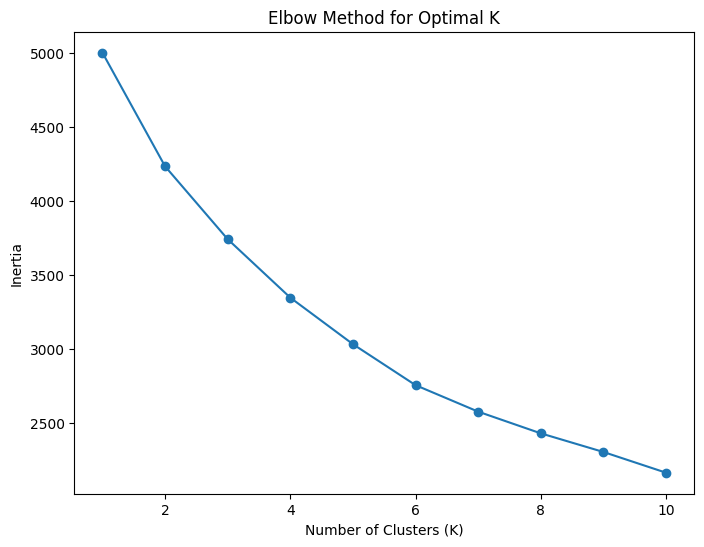

In [28]:
# Select relevant features for clustering
features_for_clustering = ['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments']

# Standardize the features using StandardScaler
scaler = StandardScaler()
credit_consumers_scaled = scaler.fit_transform(credit_consumers_df[features_for_clustering])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(credit_consumers_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [29]:
# Perform K-means clustering with K=3
kmeans_model = KMeans(n_clusters=3, random_state=42)
credit_consumers_df['Cluster'] = kmeans_model.fit_predict(credit_consumers_scaled)

# Visualize the clusters using a pair plot
fig_cluster = px.scatter_matrix(
    credit_consumers_df,
    dimensions=['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments'],
    color='Cluster',
    title='Pair Plot with Clusters - Credit Consumers DataFrame'
)

fig_cluster.show()

/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75f1704516c0>
Traceback (most recent call last):
  File "/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/adeptschneiderthedev/.miniconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/adeptschneide

In [30]:
# Visualize the clusters on a 3D scatter plot
fig_3d_cluster = px.scatter_3d(
    credit_consumers_df,
    x='TransactionAmount',
    y='LoanAmount',
    z='CreditScore',
    color='Cluster',
    size='LatePayments',
    title='3D Scatter Plot with Clusters - Credit Consumers DataFrame',
    labels={'TransactionAmount': 'Transaction Amount', 'LoanAmount': 'Loan Amount'}
)

fig_3d_cluster.show()

In [31]:
# Summary Report
cluster_summary = credit_consumers_df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'CreditScore': ['mean', 'std'],
    'TransactionAmount': ['mean', 'std'],
    'LoanAmount': ['mean', 'std'],
    'LatePayments': ['mean', 'std', 'count']
}).reset_index()

# Display the summary report
cluster_summary.columns = ['Cluster', 'Mean_Age', 'Std_Age', 'Mean_CreditScore', 'Std_CreditScore',
                            'Mean_TransactionAmount', 'Std_TransactionAmount', 'Mean_LoanAmount', 'Std_LoanAmount',
                            'Mean_LatePayments', 'Std_LatePayments', 'Count']

cluster_summary

,Cluster,Mean_Age,Std_Age,Mean_CreditScore,Std_CreditScore,Mean_TransactionAmount,Std_TransactionAmount,Mean_LoanAmount,Std_LoanAmount,Mean_LatePayments,Std_LatePayments,Count
0,0,39.000000,12.957351,414.258427,80.795590,5115.879213,2837.214231,3077.058989,1365.526196,2.606742,1.535444,356
1,1,48.141892,12.525505,651.206081,128.172612,5570.523649,2765.925142,1869.216216,1321.999228,3.888514,1.056571,296
2,2,39.439655,13.156532,676.405172,113.656973,4377.077586,2677.830786,2625.715517,1285.728996,1.040230,1.014927,348
